In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np

import missingno as msno

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# 1. 데이터 불러오기
data_dir = os.getenv('HOME')+'/aiffel/workplace/Exploration/Ex02/data'

train_data_path = join(data_dir, 'train.csv')
sub_data_path = join(data_dir, 'test.csv')

train = pd.read_csv(train_data_path)
test = pd.read_csv(sub_data_path)

In [4]:
print('train shape is :', train.shape)
display(train.info())
print('test shape is :', test.shape)
display(test.info())

train shape is : (15035, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15035 non-null  int64  
 1   date           15035 non-null  object 
 2   price          15035 non-null  float64
 3   bedrooms       15035 non-null  int64  
 4   bathrooms      15035 non-null  float64
 5   sqft_living    15035 non-null  int64  
 6   sqft_lot       15035 non-null  int64  
 7   floors         15035 non-null  float64
 8   waterfront     15035 non-null  int64  
 9   view           15035 non-null  int64  
 10  condition      15035 non-null  int64  
 11  grade          15035 non-null  int64  
 12  sqft_above     15035 non-null  int64  
 13  sqft_basement  15035 non-null  int64  
 14  yr_built       15035 non-null  int64  
 15  yr_renovated   15035 non-null  int64  
 16  zipcode        15035 non-null  int64  
 17  lat            15035 

None

test shape is : (6468, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             6468 non-null   int64  
 1   date           6468 non-null   object 
 2   bedrooms       6468 non-null   int64  
 3   bathrooms      6468 non-null   float64
 4   sqft_living    6468 non-null   int64  
 5   sqft_lot       6468 non-null   int64  
 6   floors         6468 non-null   float64
 7   waterfront     6468 non-null   int64  
 8   view           6468 non-null   int64  
 9   condition      6468 non-null   int64  
 10  grade          6468 non-null   int64  
 11  sqft_above     6468 non-null   int64  
 12  sqft_basement  6468 non-null   int64  
 13  yr_built       6468 non-null   int64  
 14  yr_renovated   6468 non-null   int64  
 15  zipcode        6468 non-null   int64  
 16  lat            6468 non-null   float64
 17  long           6468 non-n

None

In [5]:
# 컬럼을 확인했으니, taget에 해당하는 데이터를 분리해 줌
label = train['price']

In [6]:
display(train.head())
display(test.head())

id             date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0   0  20141013T000000  221900.0         3       1.00         1180      5650   
1   1  20150225T000000  180000.0         2       1.00          770     10000   
2   2  20150218T000000  510000.0         3       2.00         1680      8080   
3   3  20140627T000000  257500.0         3       2.25         1715      6819   
4   4  20150115T000000  291850.0         3       1.50         1060      9711   

   floors  waterfront  view  ...  grade  sqft_above  sqft_basement  yr_built  \
0     1.0           0     0  ...      7        1180              0      1955   
1     1.0           0     0  ...      6         770              0      1933   
2     1.0           0     0  ...      8        1680              0      1987   
3     2.0           0     0  ...      7        1715              0      1995   
4     1.0           0     0  ...      7        1060              0      1963   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98178  47.5112 -122.257           1340        5650  
1             0    98028  47.7379 -122.233           2720        8062  
2             0    98074  47.6168 -122.045           1800        7503  
3             0    98003  47.3097 -122.327           2238        6819  
4             0    98198  47.4095 -122.315           1650        9711  

[5 rows x 21 columns]

id             date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  15035  20141209T000000         3       2.25         2570      7242     2.0   
1  15036  20141209T000000         4       3.00         1960      5000     1.0   
2  15037  20140512T000000         4       4.50         5420    101930     1.0   
3  15038  20150415T000000         3       1.00         1780      7470     1.0   
4  15039  20150312T000000         3       2.50         1890      6560     2.0   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0           0     0          3      7        2170            400      1951   
1           0     0          5      7        1050            910      1965   
2           0     0          3     11        3890           1530      2001   
3           0     0          3      7        1050            730      1960   
4           0     0          3      7        1890              0      2003   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0          1991    98125  47.7210 -122.319           1690        7639  
1             0    98136  47.5208 -122.393           1360        5000  
2             0    98053  47.6561 -122.005           4760      101930  
3             0    98146  47.5123 -122.337           1780        8113  
4             0    98038  47.3684 -122.031           2390        7570

In [7]:
display(train.describe())
display(test.describe())

id         price      bedrooms     bathrooms   sqft_living  \
count  15035.000000  1.503500e+04  15035.000000  15035.000000  15035.000000   
mean    7517.000000  5.406827e+05      3.369139      2.115065   2083.790223   
std     4340.374984  3.715247e+05      0.902721      0.767519    922.134087   
min        0.000000  7.800000e+04      0.000000      0.000000    290.000000   
25%     3758.500000  3.220000e+05      3.000000      1.750000   1430.000000   
50%     7517.000000  4.500000e+05      3.000000      2.250000   1910.000000   
75%    11275.500000  6.450000e+05      4.000000      2.500000   2560.000000   
max    15034.000000  7.700000e+06     10.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  1.503500e+04  15035.000000  15035.000000  15035.000000  15035.000000   
mean   1.529697e+04      1.498071      0.007117      0.234253      3.406651   
std    4.261282e+04      0.538522      0.084063      0.763376      0.646505   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.027500e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.620000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.069550e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  15035.000000  15035.000000   15035.000000  15035.000000  15035.000000   
mean       7.660725   1794.158164     289.632059   1971.100432     83.798936   
std        1.179803    831.738609     440.663284     29.407612    400.398498   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1570.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2230.000000     550.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4130.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  15035.000000  15035.000000  15035.000000   15035.000000   15035.000000  
mean   98078.031726     47.560721   -122.213677    1992.754772   12823.884935  
std       53.297815      0.138164      0.141294     691.456442   27736.259787  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.472700   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571900   -122.231000    1850.000000    7610.000000  
75%    98117.000000     47.678300   -122.126000    2360.000000   10076.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

id    bedrooms    bathrooms  sqft_living      sqft_lot  \
count   6468.000000  6468.00000  6468.000000  6468.000000  6.468000e+03   
mean   18268.500000     3.37786     2.118313  2075.981293  1.469916e+04   
std     1867.295103     0.99064     0.775851   910.613001  3.870428e+04   
min    15035.000000     0.00000     0.000000   370.000000  6.810000e+02   
25%    16651.750000     3.00000     1.750000  1420.000000  5.084000e+03   
50%    18268.500000     3.00000     2.250000  1920.000000  7.607000e+03   
75%    19885.250000     4.00000     2.500000  2520.000000  1.066425e+04   
max    21502.000000    33.00000     6.750000  9640.000000  1.164794e+06   

            floors   waterfront         view    condition        grade  \
count  6468.000000  6468.000000  6468.000000  6468.000000  6468.000000   
mean      1.488327     0.008658     0.235467     3.416821     7.655535   
std       0.544007     0.092652     0.773616     0.658267     1.161900   
min       1.000000     0.000000     0.000000     1.000000     3.000000   
25%       1.000000     0.000000     0.000000     3.000000     7.000000   
50%       1.000000     0.000000     0.000000     3.000000     7.000000   
75%       2.000000     0.000000     0.000000     4.000000     8.000000   
max       3.500000     1.000000     4.000000     5.000000    13.000000   

        sqft_above  sqft_basement     yr_built  yr_renovated       zipcode  \
count  6468.000000    6468.000000  6468.000000   6468.000000   6468.000000   
mean   1779.556277     296.425015  1970.949443     86.933983  98077.587044   
std     820.834051     447.218709    29.292377    407.210870     53.936590   
min     370.000000       0.000000  1900.000000      0.000000  98001.000000   
25%    1200.000000       0.000000  1952.000000      0.000000  98032.000000   
50%    1550.000000       0.000000  1975.000000      0.000000  98065.000000   
75%    2190.000000     590.000000  1997.000000      0.000000  98118.000000   
max    8020.000000    4820.000000  2015.000000   2015.000000  98199.000000   

               lat         long  sqft_living15     sqft_lot15  
count  6468.000000  6468.000000    6468.000000    6468.000000  
mean     47.558726  -122.214039    1974.429654   12659.800402  
std       0.139659     0.139766     671.597761   26380.422371  
min      47.159300  -122.512000     460.000000     748.000000  
25%      47.467175  -122.327000    1480.000000    5100.000000  
50%      47.572150  -122.229000    1820.000000    7664.500000  
75%      47.677400  -122.123000    2370.000000   10125.000000  
max      47.777600  -121.364000    5610.000000  438213.000000

In [8]:
print('count of null in train data\n',train.isnull().sum())
print('count of null in test data\n',test.isnull().sum())
print('count of null in label data\n',label.isnull().sum())

count of null in train data
 id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64
count of null in test data
 id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64
count of null in label data
 0


In [9]:
# 데이터 처리전 데이터 세이브

train_save = train
test_save = test
label_save = label

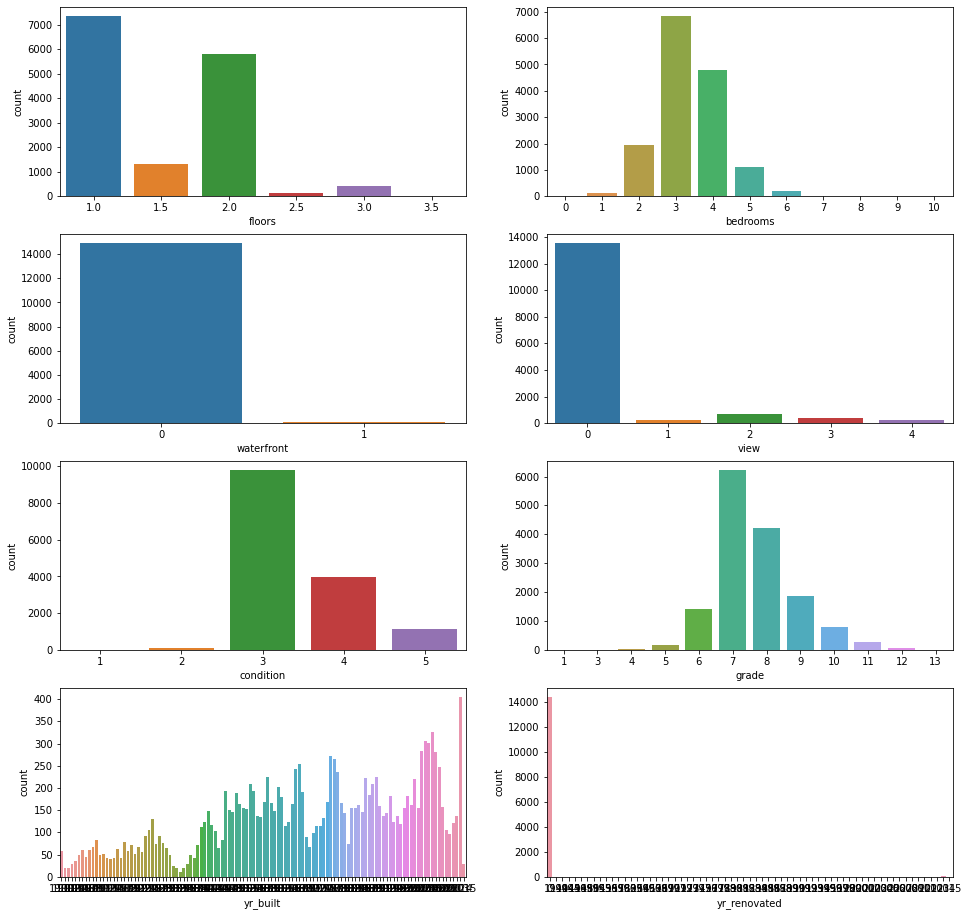

In [10]:
# 결측값이 없는 것으로 확인하였음
# 몇가지 칼럼이 카테고리형 인 것으로 확인되어 해당 칼럼에 대한 시각화 수행

fig, ax1 = plt.subplots(figsize=(16, 16), ncols=2, nrows=4)
category_feat_list = ['floors', 'bedrooms', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated']
for i, category_feat in enumerate(category_feat_list):
    row = int(i/2)
    col = i%2
    sns.countplot(x=category_feat, data=train, ax=ax1[row][col])

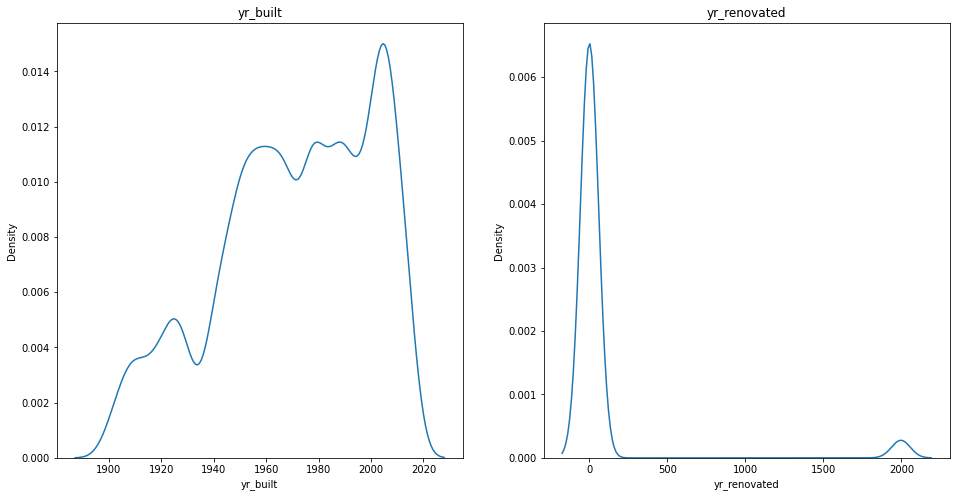

In [11]:
# 일부 데이터의 경우 countplot으로 면밀히 보이지 않음으로 다른 방식으로 시각화

fig, ax2 = plt.subplots(figsize=(16, 8), ncols=2, nrows=1)
category_feat_list2 = ['yr_built', 'yr_renovated']
for i, category_feat in enumerate(category_feat_list2):
    col = i%2
    ax2[col].set_title(category_feat)
    sns.kdeplot(x=category_feat, data=train, ax=ax2[col])

In [12]:
# yr_built 및 yr_renovated에 대하여 구간화가 필요한 것으로 확인됨
# yr_built의 경우 1950년울 전후로, 2000년을 전후로 변동이 보임으로 이를 기준으로 구간화를 진행함
# yt_renovated의 경우 renovated 여부에 따라 뤈 핫 인코딩이 필요함

def yr_sectionazation(dataframe):
    # yr_built 구간화
    bins = [1900, 1950, 2000, 2020]
    labels = ['1950s', '2000s', '2020s']
    yr_b = pd.cut(dataframe['yr_built'], bins = bins, labels=labels)
    yr_b = pd.DataFrame(yr_b)
    yr_b = pd.get_dummies(yr_b)
    # yr_renovated의 경우 분포에 따라 구간화를 진행하겠음
    bins2 = [1900, 2000, 2020]
    labels2 = ['old', 'recent']
    yr_r = pd.cut(dataframe['yr_renovated'], bins = bins2, labels=labels2)
    yr_r = pd.DataFrame(yr_r)
    yr_r = pd.get_dummies(yr_r)
    for i in labels:
        dataframe['yr_built_'+i] = yr_b['yr_built_'+i]
    for i in labels2:
        dataframe['yr_renovated_'+i] = yr_r['yr_renovated_'+i]
    return

yr_sectionazation(train)

train

id             date      price  bedrooms  bathrooms  sqft_living  \
0          0  20141013T000000   221900.0         3       1.00         1180   
1          1  20150225T000000   180000.0         2       1.00          770   
2          2  20150218T000000   510000.0         3       2.00         1680   
3          3  20140627T000000   257500.0         3       2.25         1715   
4          4  20150115T000000   291850.0         3       1.50         1060   
...      ...              ...        ...       ...        ...          ...   
15030  15030  20141014T000000   610685.0         4       2.50         2520   
15031  15031  20150326T000000  1007500.0         4       3.50         3510   
15032  15032  20140521T000000   360000.0         3       2.50         1530   
15033  15033  20150223T000000   400000.0         4       2.50         2310   
15034  15034  20141015T000000   325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view  ...  zipcode      lat     long  \
0          5650     1.0           0     0  ...    98178  47.5112 -122.257   
1         10000     1.0           0     0  ...    98028  47.7379 -122.233   
2          8080     1.0           0     0  ...    98074  47.6168 -122.045   
3          6819     2.0           0     0  ...    98003  47.3097 -122.327   
4          9711     1.0           0     0  ...    98198  47.4095 -122.315   
...         ...     ...         ...   ...  ...      ...      ...      ...   
15030      6023     2.0           0     0  ...    98056  47.5137 -122.167   
15031      7200     2.0           0     0  ...    98136  47.5537 -122.398   
15032      1131     3.0           0     0  ...    98103  47.6993 -122.346   
15033      5813     2.0           0     0  ...    98146  47.5107 -122.362   
15034      1076     2.0           0     0  ...    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  yr_built_1950s  yr_built_2000s  \
0               1340        5650               0               1   
1               2720        8062               1               0   
2               1800        7503               0               1   
3               2238        6819               0               1   
4               1650        9711               0               1   
...              ...         ...             ...             ...   
15030           2520        6023               0               0   
15031           2050        6200               0               0   
15032           1530        1509               0               0   
15033           1830        7200               0               0   
15034           1020        1357               0               0   

       yr_built_2020s  yr_renovated_old  yr_renovated_recent  
0                   0                 0                    0  
1                   0                 0                    0  
2                   0                 0                    0  
3                   0                 0                    0  
4                   0                 0                    0  
...               ...               ...                  ...  
15030               1                 0                    0  
15031               1                 0                    0  
15032               1                 0                    0  
15033               1                 0                    0  
15034               1                 0                    0  

[15035 rows x 26 columns]

In [13]:
# datetime을 연, 월, 일로 분류
def trans_datetime(dataframe):
    dataframe['date'] = pd.to_datetime(dataframe['date'])
    dataframe['year'] = dataframe['date'].dt.year
    dataframe['month'] = dataframe['date'].dt.month
    dataframe['day'] = dataframe['date'].dt.day
    return

trans_datetime(train)

train

id       date      price  bedrooms  bathrooms  sqft_living  \
0          0 2014-10-13   221900.0         3       1.00         1180   
1          1 2015-02-25   180000.0         2       1.00          770   
2          2 2015-02-18   510000.0         3       2.00         1680   
3          3 2014-06-27   257500.0         3       2.25         1715   
4          4 2015-01-15   291850.0         3       1.50         1060   
...      ...        ...        ...       ...        ...          ...   
15030  15030 2014-10-14   610685.0         4       2.50         2520   
15031  15031 2015-03-26  1007500.0         4       3.50         3510   
15032  15032 2014-05-21   360000.0         3       2.50         1530   
15033  15033 2015-02-23   400000.0         4       2.50         2310   
15034  15034 2014-10-15   325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view  ...  sqft_living15  sqft_lot15  \
0          5650     1.0           0     0  ...           1340        5650   
1         10000     1.0           0     0  ...           2720        8062   
2          8080     1.0           0     0  ...           1800        7503   
3          6819     2.0           0     0  ...           2238        6819   
4          9711     1.0           0     0  ...           1650        9711   
...         ...     ...         ...   ...  ...            ...         ...   
15030      6023     2.0           0     0  ...           2520        6023   
15031      7200     2.0           0     0  ...           2050        6200   
15032      1131     3.0           0     0  ...           1530        1509   
15033      5813     2.0           0     0  ...           1830        7200   
15034      1076     2.0           0     0  ...           1020        1357   

       yr_built_1950s  yr_built_2000s  yr_built_2020s  yr_renovated_old  \
0                   0               1               0                 0   
1                   1               0               0                 0   
2                   0               1               0                 0   
3                   0               1               0                 0   
4                   0               1               0                 0   
...               ...             ...             ...               ...   
15030               0               0               1                 0   
15031               0               0               1                 0   
15032               0               0               1                 0   
15033               0               0               1                 0   
15034               0               0               1                 0   

       yr_renovated_recent  year  month  day  
0                        0  2014     10   13  
1                        0  2015      2   25  
2                        0  2015      2   18  
3                        0  2014      6   27  
4                        0  2015      1   15  
...                    ...   ...    ...  ...  
15030                    0  2014     10   14  
15031                    0  2015      3   26  
15032                    0  2014      5   21  
15033                    0  2015      2   23  
15034                    0  2014     10   15  

[15035 rows x 29 columns]

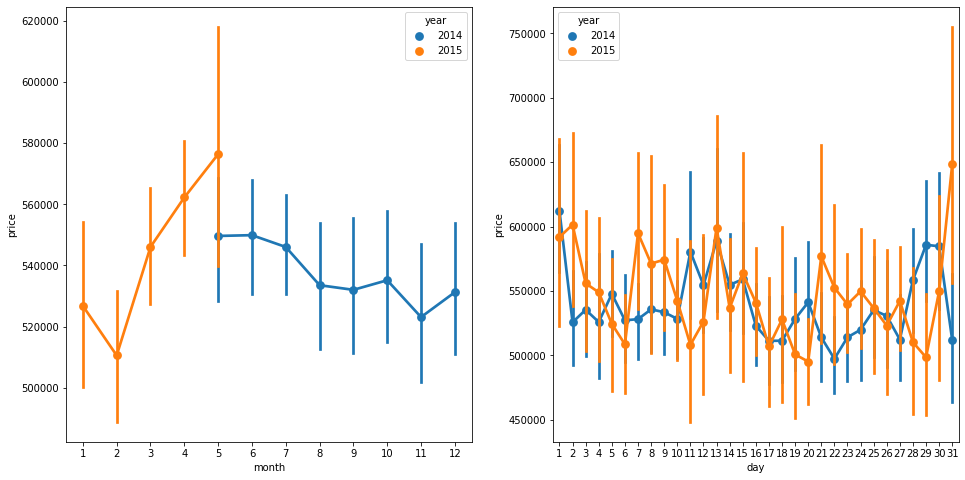

In [14]:
# 연속형(시간) 변수들에 대하여 시각화
fig, ax3 = plt.subplots(figsize=(16, 8), ncols=2, nrows=1)
time_feat_list = ['month', 'day']
for i, time_feat in enumerate(time_feat_list):
    col = i%3
    sns.pointplot(x=time_feat, y='price', hue ='year', data=train, ax=ax3[col])
# 구매 년도보다 구매 월이 중요한 차이를 보이는 것으로 확인됨
# 구매일은 큰 경향이 없는 것으로 확인됨

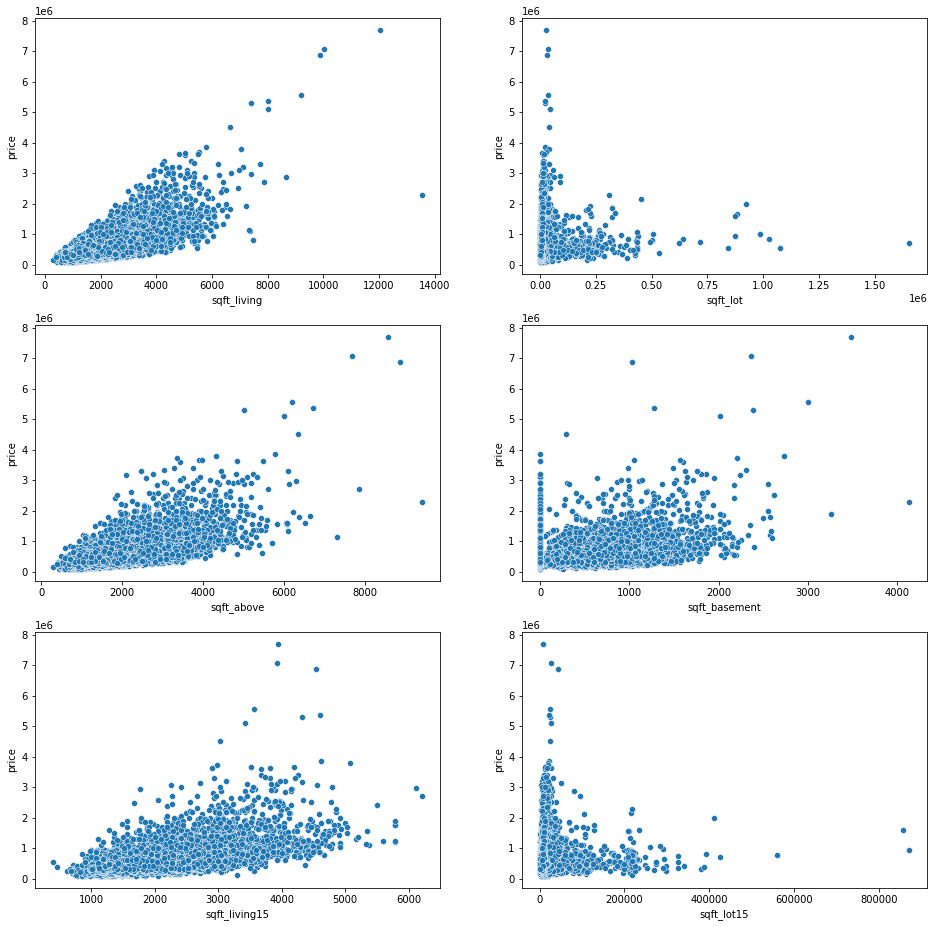

In [15]:
# 연속형(면적기반) 변수들에 대하여 시각화
fig, ax4 = plt.subplots(figsize=(16, 16), ncols=2, nrows=3)
serial_feat_list = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']
for i, serial_feat in enumerate(serial_feat_list):
    row = int(i/2)
    col = i%2
    sns.scatterplot(x=serial_feat, y='price', data=train, ax=ax4[row][col])
# 모두 상관성이 있는 것으로 확인됨

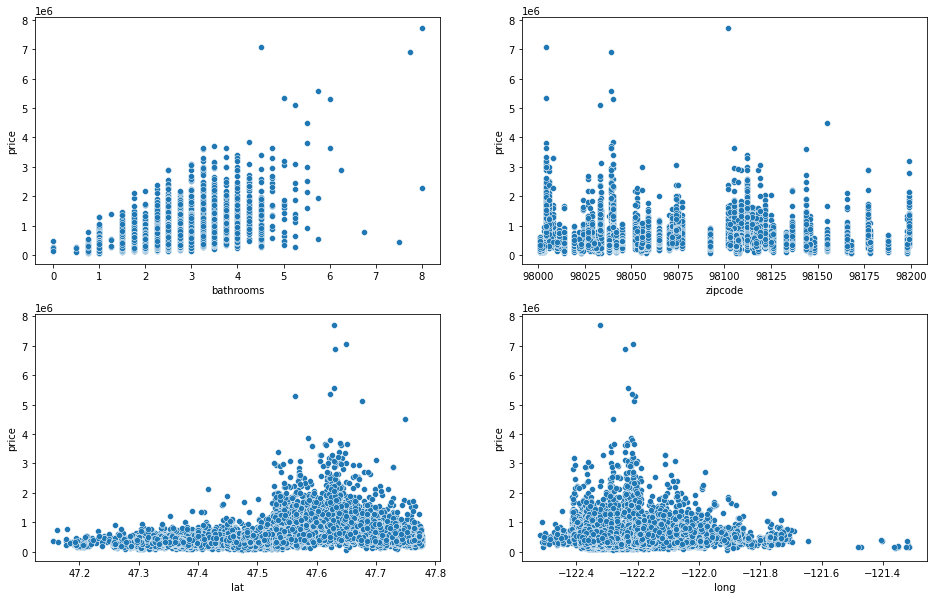

In [16]:
# 그 외 변수들에 대하여 시각화
fig, ax5 = plt.subplots(figsize=(16, 10), ncols=2, nrows=2)
serial_feat_list2 = ['bathrooms', 'zipcode', 'lat', 'long']
for i, serial_feat in enumerate(serial_feat_list2):
    row = int(i/2)
    col = i%2
    sns.scatterplot(x=serial_feat, y='price', data=train, ax=ax5[row][col])
# 위도와 경도가 예상보다 상관성이 있는 것 같음
# 부유한 지역과 아닌 지역이 나뉘는 것으로 추정
# 우편번호는 예상대로 큰 의미가 없는 것으로 추정

<function matplotlib.pyplot.show(close=None, block=None)>

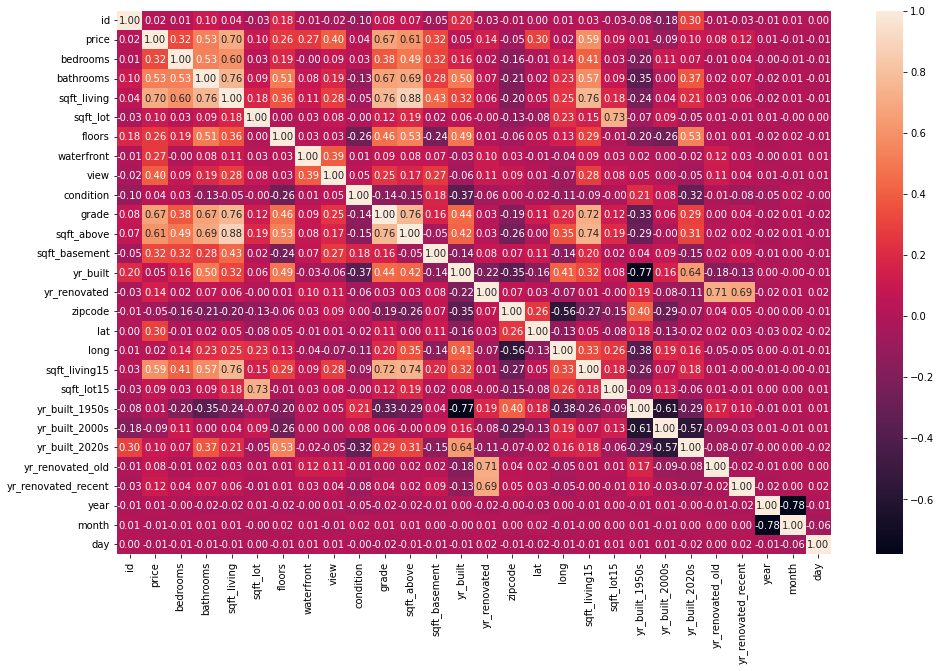

In [17]:
corr = train.corr()
plt.figure(figsize=(16,10))

sns.heatmap(corr, annot=True, fmt='.2f')
plt.show

In [18]:
# 위 시각화를 토대로 의미 없는 데이터에 대한 drop 조치를 진행하고, 원 핫 인코딩도 진행
encording_feat = ['floors', 'bedrooms', 'waterfront', 'view', 'condition', 'grade', 'month', 'day']
drop_feat = ['id', 'price', 'date', 'yr_built', 'yr_renovated', 'zipcode', 'year']

train = pd.get_dummies(train, columns = ['floors', 'waterfront', 'month', 'day'])

for i in drop_feat:
    train.drop(columns=i,axis=1,inplace=True)

train

bedrooms  bathrooms  sqft_living  sqft_lot  view  condition  grade  \
0             3       1.00         1180      5650     0          3      7   
1             2       1.00          770     10000     0          3      6   
2             3       2.00         1680      8080     0          3      8   
3             3       2.25         1715      6819     0          3      7   
4             3       1.50         1060      9711     0          3      7   
...         ...        ...          ...       ...   ...        ...    ...   
15030         4       2.50         2520      6023     0          3      9   
15031         4       3.50         3510      7200     0          3      9   
15032         3       2.50         1530      1131     0          3      8   
15033         4       2.50         2310      5813     0          3      8   
15034         2       0.75         1020      1076     0          3      7   

       sqft_above  sqft_basement      lat  ...  day_22  day_23  day_24  \
0            1180              0  47.5112  ...       0       0       0   
1             770              0  47.7379  ...       0       0       0   
2            1680              0  47.6168  ...       0       0       0   
3            1715              0  47.3097  ...       0       0       0   
4            1060              0  47.4095  ...       0       0       0   
...           ...            ...      ...  ...     ...     ...     ...   
15030        2520              0  47.5137  ...       0       0       0   
15031        2600            910  47.5537  ...       0       0       0   
15032        1530              0  47.6993  ...       0       0       0   
15033        2310              0  47.5107  ...       0       1       0   
15034        1020              0  47.5941  ...       0       0       0   

       day_25  day_26  day_27  day_28  day_29  day_30  day_31  
0           0       0       0       0       0       0       0  
1           1       0       0       0       0       0       0  
2           0       0       0       0       0       0       0  
3           0       0       1       0       0       0       0  
4           0       0       0       0       0       0       0  
...       ...     ...     ...     ...     ...     ...     ...  
15030       0       0       0       0       0       0       0  
15031       0       1       0       0       0       0       0  
15032       0       0       0       0       0       0       0  
15033       0       0       0       0       0       0       0  
15034       0       0       0       0       0       0       0  

[15035 rows x 69 columns]

<AxesSubplot:>

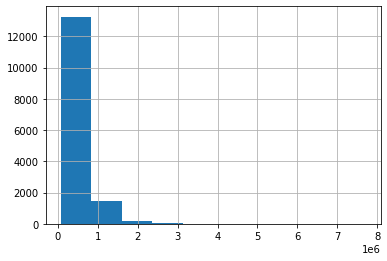

In [19]:
# 라벨 데이터에 대하여 정규화 시행
label.hist()

<AxesSubplot:>

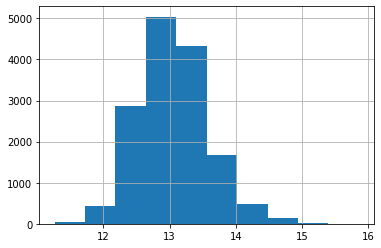

In [20]:
label=np.log1p(label)
label.hist()

In [21]:
# 모델 선정 함수 생성
# 모델 수행 및 평가 함수 생성
# grid_cv 하이퍼 파라미터 개선 함수 생성
# 제출형식에 맞게 계측 결과를 저장하는 함수 생성

from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

gboost = GradientBoostingRegressor(random_state=0)
xgboost = xgb.XGBRegressor(random_state=0)
lightgbm = lgb.LGBMRegressor(random_state=0)

models = [gboost, xgboost, lightgbm]

def rmse_cal(label, pred):
    rmse = np.sqrt(mean_squared_error(np.expm1(label), np.expm1(pred)))
    return rmse

def get_cv_score(model, train, label):
    kfold = KFold(n_splits=5).get_n_splits(train)
    CV_score = np.mean(cross_val_score(model, X=train, y=label, cv=kfold))
    print(model.__class__.__name__)
    print(CV_score)
    return

def reg_predict_rmse(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    rmse = rmse_cal(y_test, y_pred)
    print(model.__class__.__name__)
    print('RMSE is', rmse)
    
def reg_coef_plot(model, x, i=20):
    feat_s = pd.Series(model.feature_importances_, index=x.columns)
    feat_s = feat_s.sort_values(ascending=False)[:i]
    sns.barplot(x=feat_s.values , y=feat_s.index)
    
def my_GridSearch(model, x_train, y_train, param_grid, verbose=2, n_jobs=5):
    grid_model = GridSearchCV(model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=verbose, n_jobs=n_jobs)
    grid_model.fit(x_train, y_train)
    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']
    results = pd.DataFrame(params)
    results['score'] = score
    results['RMSLE'] = np.sqrt(-1 * results['score'])
    results = results.sort_values('RMSLE')
    return results

def save_submission(model, train, y, test, model_name, rmsle=None):
    model.fit(train, y)
    prediction = model.predict(test)
    prediction = np.expm1(prediction)
    submission_path = join(data_dir, 'sample_submission.csv')
    submission = pd.read_csv(submission_path)
    submission['price'] = prediction
    submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir, model_name, rmsle)
    submission.to_csv(submission_csv_path, index=False)
    print('{} saved!'.format(submission_csv_path))

In [22]:
#test 데이터에 대하여 train 데이터에 시행한 과정을 동일히 수행함

trans_datetime(test)
yr_sectionazation(test)

drop_feat = ['id', 'date', 'yr_built', 'yr_renovated', 'zipcode', 'year']

test = pd.get_dummies(test, columns = ['floors', 'waterfront', 'month', 'day'])

for i in drop_feat:
    test.drop(columns=i,axis=1,inplace=True)

test

bedrooms  bathrooms  sqft_living  sqft_lot  view  condition  grade  \
0            3       2.25         2570      7242     0          3      7   
1            4       3.00         1960      5000     0          5      7   
2            4       4.50         5420    101930     0          3     11   
3            3       1.00         1780      7470     0          3      7   
4            3       2.50         1890      6560     0          3      7   
...        ...        ...          ...       ...   ...        ...    ...   
6463         3       1.75         1500     11968     0          3      6   
6464         3       2.00         1490      1126     0          3      8   
6465         3       2.50         1310      1294     0          3      8   
6466         2       0.75         1020      1350     0          3      7   
6467         3       2.50         1600      2388     0          3      8   

      sqft_above  sqft_basement      lat  ...  day_22  day_23  day_24  day_25  \
0           2170            400  47.7210  ...       0       0       0       0   
1           1050            910  47.5208  ...       0       0       0       0   
2           3890           1530  47.6561  ...       0       0       0       0   
3           1050            730  47.5123  ...       0       0       0       0   
4           1890              0  47.3684  ...       0       0       0       0   
...          ...            ...      ...  ...     ...     ...     ...     ...   
6463        1500              0  47.3095  ...       0       0       0       0   
6464        1490              0  47.5699  ...       0       0       0       0   
6465        1180            130  47.5773  ...       0       0       0       0   
6466        1020              0  47.5944  ...       0       1       0       0   
6467        1600              0  47.5345  ...       0       0       0       0   

      day_26  day_27  day_28  day_29  day_30  day_31  
0          0       0       0       0       0       0  
1          0       0       0       0       0       0  
2          0       0       0       0       0       0  
3          0       0       0       0       0       0  
4          0       0       0       0       0       0  
...      ...     ...     ...     ...     ...     ...  
6463       1       0       0       0       0       0  
6464       1       0       0       0       0       0  
6465       0       0       0       0       0       0  
6466       0       0       0       0       0       0  
6467       0       0       0       0       0       0  

[6468 rows x 69 columns]

In [23]:
# gris_cv 및 cross_val을 이용하여 모델을 평가하였음
# 추가적으로 실제 분리된 테스트 및 검증 데이터로 모델의 rmse를 산출하여, 대회 기준에서의 모델 성능도 확인해 봄
# 시험 결과 양측 결과모두 LGBMRegressor가 가장 좋은 모델로 확인됨
for model1 in models:
    get_cv_score(model1, train, label)

X_train, X_test, y_train, y_test = train_test_split(train, label, test_size=0.2, random_state=0)

for i, model2 in enumerate(models):
    reg_predict_rmse(model2, X_train, X_test, y_train, y_test)

GradientBoostingRegressor
0.8749985239138491
XGBRegressor
0.8928419246314447
LGBMRegressor
0.8995555434033454
GradientBoostingRegressor
RMSE is 134484.00822845125
XGBRegressor
RMSE is 113389.78489630786
LGBMRegressor
RMSE is 117357.87445112798


In [ ]:
# 너무 많은 변수를 할당하니 27000회를 학습하며, 끝나지 않는 학습이 진행됬다
# 대략적으로 확인해 본 결과 n_estimator, max_depth, learning_rate 등이 중요한 하이퍼 파라미터인것 같다
# 위에서 이야기된 파라미터를 위주로 그리드 서치를 해야함
param_grid = {
    'n_estimators': [50, 100, 1000],
    'max_depth': [-1, 1, 5, 10],
    'num_leaves' : [70, 80],
    'learning_rate': [0.01, 0.1, 1],
    'subsample' : [0.6 , 0.8 , 1],
    'metric' : ['rmse', 'auc']
}

model = lightgbm

my_GridSearch(model, X_train, y_train, param_grid, verbose=2, n_jobs=5)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


In [ ]:
model = lgb.LGBMRegressor(learning_rate=0.01, metric='auc', max_depth=10, n_estimators=1000, num_leaves=70, subsample=1, random_state=0)

save_submission(model, train, label, test, model_name='LGBMRegressor', rmsle=0.165359)

### 몇가지 에러에 대한 회고

1. 무군별한 원-핫-인코딩
    - 처음 원 핫 인코딩을 진행할 때 ('bedrooms', 'view', 'condition', 'grade')데이터를 추가로 진행하였음.
    - 위 행동의 결과로 test 데이터와 columns 수가 동일해 지지 않았음
    - 추가로 뒤 카테고리 값의 경우 단계가 높을 수록 target에 좋은 영향을 주는 관계가 있음
    - 또한 숫자형 인덱스가 데이터간의 관계성을 외곡하지 않고, 오히려 단계에 따른 관계를 더 잘 보여줌
    - 따라서 위 값들의 경우 변경을 하지 않고 그냥 사용해도 무관하였음
    - 이 부분에 대하여 깊게 생각해보지 않아 처음 오류에 많은 시간을 쏟았으며, 이가 매우 아쉬웠음
2. sample_submission shape와 test shape 비교하지 않음
    - 처음 데이터를 import 했을 때, 실습을 진행해야 하는 데이터와 상이한 데이터를 받았음
    - submission의 경우 save_submission 함수를 이용하여, 생성하고 저장하는데, 해당 과정에서 sample_submission 데이터를 읽어옴
    - 이후 읽어온 sample_submission 데이터의 'price' column에 예측한 값을 넣어주게 됨
    - 이 과정에서 예측을 수행한 test 데이터의 shape와 sample_submission 데이터의 shape가 서로 달라 저장이 안되었음
    - 마감 기한이 다가와 촉박한 상황에 해당 오류를 수정하는 데 약간의 시간을 소요하여 아쉬웠음
3. 너무 많은 gridsearch_cv 하이퍼 파라미터를 입력함
    - 더 좋은 정확도를 가진 모델을 만들기 위해 7개의 하이퍼 파라미터를 gridsearch에 입력함
    - 총 시행횟수는 27000회였으며, 시행하는데 30분 이상에 시간을 사용함
    - 하지만 모델의 성능에 많은 영향을 미치는 부분이 아니었고, rmsle기준 0.003의 정확도 차이밖에 없었음
    - 앞으로는 모델과 데이터, 하이퍼 파라미터를 좀 더 살펴보고 모델에 중요한 영향을 미치는 파라미터를 변경해야함을 배웠음
4. 전처리 과정에서 미흡
    - 실제 노드에서는 전처리 과정 중, train 데이터와 test 데이터를 합하여, 둘의 분포를 종합적으로 확인하고,
    - 어느 값으로 편향된 데이터의 경우 정규화 과정을 진행하였음
    - 하지만 본 실습에서는 label 데이터에만 정규화를 진행하였음
    - feature 중 day의 경우 target과의 상관관계는 -0.01로 미미하며, 실제 그래프를 보아도 특별한 경향은 없는 것으로 확인했음
    - 하지만 day를 제거할 시 모델의 성능이 낮아질 것을 우려하여, 해뎅 feature를 제거하지 않았음
    - 만일 제거하였다면, 더 좋은 성능을 얻었을 수도 있음
5. feature_importances_ 과정을 사용하지 않음
    - 20번 코드를 살펴보면, 학습된 모델에 feature_importances_를 확인하는 함수가 있음
    - 모델의 feature_importances_를 확인하면, 중요도가 낮은 feature를 제거하기에 용이함
    - 또한 계형을 잘 확인하면, 사용자가 중요하게 생각하는 부분과 실제 모델의 중요 feature간의 차이를 알 수 있음
    - 위 내용을 이용하면 중요하지 않은 데이터가 학습에 비중을 차지하며, 학습 성능을 저해하는 부분에 대하여 제거하거나, 중요한 데이터 임에도 학습에서 큰 비중을 차지하지 못하는 데이터에 대하여 조치를 취할 수 있음
    - 이를 사용하였어야 했으나, 시각화 부분에서 문제가 생겨 사용하지 못하였음
    - 만일 모델을 학습하고 예측하는 함수에 본 내용을 추가하였으면 더 좋았을 것

### kaggle 제출 및 score

![image](./img/img.png)